# Bonus : modèles de Deep Learning

Cette partie bonus nous a permis d'expérimenter 2 modèles de réseaux de neurones.

Pour des raisons de simplicité, cette partie n'a pas vocation à être ré-exécutée, mais en cas de besoin nous pouvons vous fournir tous les fichiers né cessaires pour la ré-exécuter. (cf [notre Github https://github.com/jExbrayat/recognize-handwritten-letters](https://github.com/jExbrayat/recognize-handwritten-letters))

## Modèle 1

In [22]:
import os
import pickle

import numpy as np

from src.data.load_data import load_sample_train_test
from src.data.preprocessing import preprocess
from src.utils.misc import init_notebook

os.environ["KERAS_BACKEND"] = "torch"

from keras.callbacks import EarlyStopping, History
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras.metrics import F1Score
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

In [5]:
init_notebook()

In [12]:
x_train, x_test, y_train, y_test = load_sample_train_test()
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [13]:
x_train.astype("float32")

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2392, 784), dtype=float32)

In [14]:
# Transform targets into categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(26, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy", F1Score()],
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=25,
    mode="min",
    restore_best_weights=True,
    start_from_epoch=50,
)

history = History()

model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping, history],
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0992 - f1_score: 0.0700 - loss: 3.1443 - val_accuracy: 0.3528 - val_f1_score: 0.3154 - val_loss: 2.3833
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4563 - f1_score: 0.4262 - loss: 2.0139 - val_accuracy: 0.5741 - val_f1_score: 0.5606 - val_loss: 1.5368
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6673 - f1_score: 0.6532 - loss: 1.2653 - val_accuracy: 0.6681 - val_f1_score: 0.6631 - val_loss: 1.1810
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7353 - f1_score: 0.7214 - loss: 0.9394 - val_accuracy: 0.7098 - val_f1_score: 0.7120 - val_loss: 1.0096
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7882 - f1_score: 0.7766 - loss: 0.7749 - val_accuracy: 0.7035 - val_f1_score: 0.7052 - val_loss: 1.0053
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8283 - f1_score: 0.8187 - loss: 0.6440 - val_accuracy: 0.7432 - val_f1_score: 0.7446 - val_loss:

In [35]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,536 (623.19 KB)

 Trainable params: 53,178 (207.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,358 (415.46 KB)

In [20]:
model_eval = model.evaluate(x_train, y_train)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9117 - f1_score: 0.9063 - loss: 0.3493


In [21]:
model_eval_test = model.evaluate(x_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - f1_score: 0.7445 - loss: 0.7558


In [ ]:
# Save model's weights and history
# save_path = "data/model_results/classic"
# model.save(f"{save_path}/one_hidden_layer_22-12-23.h5")
# with open(f"{save_path}/one_hidden_layer_history_22-12-23.pkl", "wb") as history_file:
#     pickle.dump(history.history, history_file)
#
# # Get model's loss and accuracy
# model_eval = model.evaluate(X, y)
#
# with open(f"{save_path}/one_hidden_layer_evaluate_22-12-23.pkl", "wb") as eval_file:
#     pickle.dump(model_eval, eval_file)

## Modèle 2 : réseau de convolution

In [26]:
x_train.shape

(2392, 784)

In [38]:
model = Sequential()
model.add(Input(shape=(784,)))
# model.add(Conv2D(32, (3, 3), activation="relu"))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(26, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy", F1Score()],
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=50,
    mode="min",
    restore_best_weights=True,
    start_from_epoch=150,
)

history = History()

model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping, history],
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1992 - f1_score: 0.1555 - loss: 2.9905 - val_accuracy: 0.4697 - val_f1_score: 0.4553 - val_loss: 2.0963
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6021 - f1_score: 0.5759 - loss: 1.7247 - val_accuracy: 0.6347 - val_f1_score: 0.6315 - val_loss: 1.3990
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7230 - f1_score: 0.7128 - loss: 1.1713 - val_accuracy: 0.6681 - val_f1_score: 0.6649 - val_loss: 1.1157
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7745 - f1_score: 0.7681 - loss: 0.9132 - val_accuracy: 0.7203 - val_f1_score: 0.7257 - val_loss: 0.9897
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8162 - f1_score: 0.8044 - loss: 0.7628 - val_accuracy: 0.7349 - val_f1_score: 0.7391 - val_loss: 0.9032
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8267 - f1_score: 0.8193 - loss: 0.6584 - val_accuracy: 0.7537 - val_f1_score: 0.7549 - val_loss:

In [40]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,792 (608.56 KB)

 Trainable params: 51,930 (202.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 103,862 (405.71 KB)

In [ ]:
# Get model's loss and accuracy
model_eval = model.evaluate(X, y)

# Save model's results
save_path = "data/model_weights/cnn"

model.save(f"{save_path}/cnn_experiment_21-12-23.h5")

with open(f"{save_path}/cnn_experiment_history_21-12-23.pkl", "wb") as history_file:
    pickle.dump(history.history, history_file)

with open(f"{save_path}/cnn_experiment_evaluate.pkl", "wb") as eval_file:
    pickle.dump(model_eval, eval_file)

## Affichage des résultats ci-dessous

In [ ]:
import os
import pickle

import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical

In [ ]:
def plot_training_curve(
    training_loss: list,
    validation_loss: list,
    plot_from_n_epoch: int,
    validation_accuracy: list = None,
    save_path: str = None,
) -> None:
    """Plot training curves of a keras model
    (train loss, val loss, val accuracy if classification model)

    Args:
        training_loss (list): training loss
        gathered from history callback

        validation_loss (list): validation loss
        gathered from history callback

        validation_accuracy (list): validation accuracy gathered
        from history callback

        plot_from_n_epoch (int): epoch from which to plot when there are too many
        save_path (str): path to save plot in .png format

    """
    num_epochs_to_display = len(training_loss) - plot_from_n_epoch
    step_x_ticks = max(int(num_epochs_to_display / 10), 1)

    plt.plot(training_loss[plot_from_n_epoch:], label="training loss")
    plt.plot(validation_loss[plot_from_n_epoch:], label="validation loss")

    if validation_accuracy is not None:
        plt.plot(validation_accuracy[plot_from_n_epoch:], label="validation accuracy")

    plt.legend()
    plt.title("training curve")

    plt.xticks(
        np.arange(0, num_epochs_to_display, step=step_x_ticks),
        np.arange(
            plot_from_n_epoch + 1,
            plot_from_n_epoch + num_epochs_to_display + 1,
            step=step_x_ticks,
        ),
    )

    if save_path is not None:
        plt.savefig(save_path)

    plt.show()

## Lire les résultats du modèle

Nous allons lire et afficher les résultats du modèle de CNN uniquement.

In [ ]:
model_results_folder = "data/model_results/cnn"

In [ ]:
with open(
    f"{model_results_folder}/cnn_experiment_history_21-12-23.pkl", "rb"
) as pickle_file:
    model_history = pickle.load(pickle_file)

In [ ]:
with open(
    f"{model_results_folder}/cnn_experiment_evaluate_21-12-23.pkl", "rb"
) as pickle_file:
    model_evaluate = pickle.load(pickle_file)

## Affichage des courbes d'entraînement

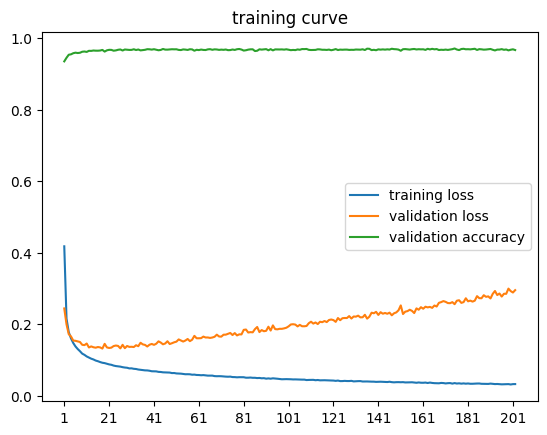

In [ ]:
plot_training_curve(
    training_loss=model_history["loss"],
    validation_loss=model_history["val_loss"],
    validation_accuracy=model_history["val_accuracy"],
    plot_from_n_epoch=0,
    save_path=f"{model_results_folder}/training_curve.png",
)

In [ ]:
print(f"categorical_crossentropy (loss) = {model_evaluate[0]}")
print(f"accuracy = {model_evaluate[1]}")

categorical_crossentropy (loss) = 0.0686769038438797
accuracy = 0.9871518015861511


## Matrice de confusion
### Prédiction jeu de test

In [ ]:
model = load_model(f"{model_results_folder}/cnn_experiment_21-12-23.h5")

In [ ]:
full_test_dataset_path = "data/raw/test-dataset.csv"
sample_test_dataset_path = "data/raw/sample-test-dataset.csv"

In [ ]:
# Open full test dataset if it exists locally, open sample test dataset otherwise

if os.path.exists(full_test_dataset_path):
    test_dataset = np.loadtxt(full_test_dataset_path, delimiter=",")
else:
    test_dataset = np.loadtxt(sample_test_dataset_path, delimiter=",")

In [ ]:
y = test_dataset[:, 0]
X = test_dataset[:, 1:]

In [ ]:
y_categorical = to_categorical(y)

In [ ]:
y_pred = model.predict(X)

2907/2907 [==============================] - 17s 5ms/step


### Conversion y_pred formal original

In [ ]:
y_pred_convert = list(map(np.argmax, y_pred))

In [ ]:
letters = [chr(i) for i in range(ord("a"), ord("z") + 1)]

### Affichage matrice de confusion

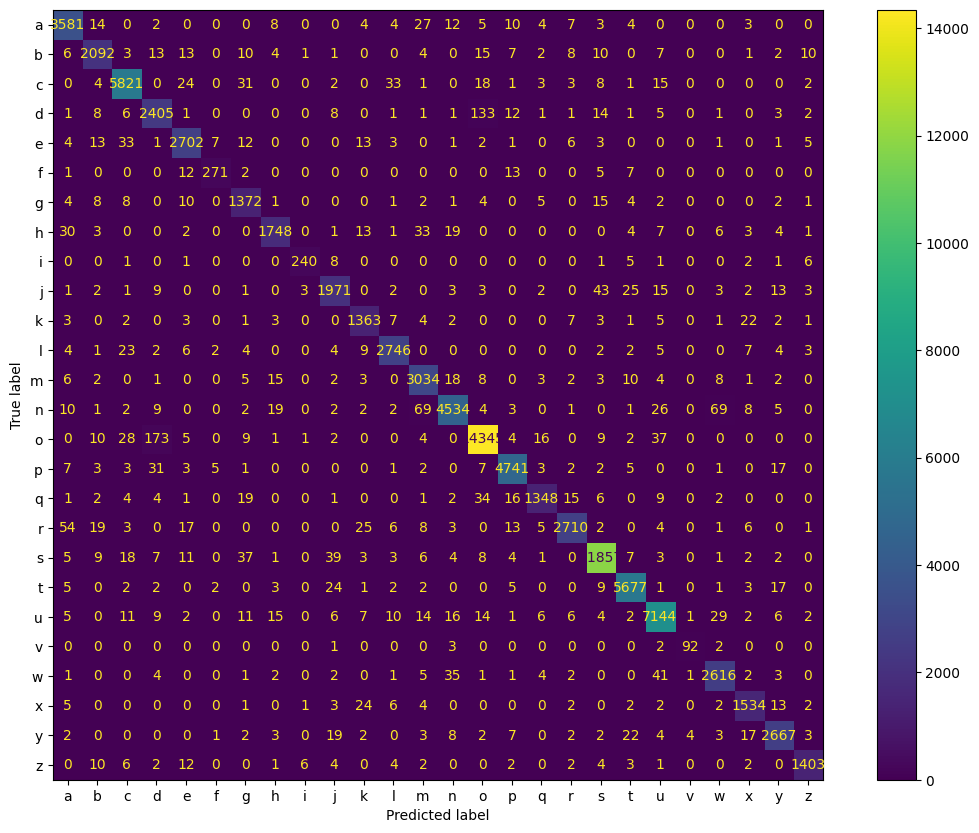

In [ ]:
cm = confusion_matrix(y_true=y, y_pred=y_pred_convert)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=letters)

fig, ax = plt.subplots(figsize=(14, 10))
disp.plot(ax=ax)
plt.savefig(f"{model_results_folder}/confusion_matrix.png")
plt.show()

# Scores calculated on test dataset

In [ ]:
from sklearn.metrics import f1_score, recall_score

f1 = f1_score(y, y_pred_convert, average="weighted")
accuracy = accuracy_score(y, y_pred_convert)
precision = precision_score(y, y_pred_convert, average="weighted")
recall = recall_score(y, y_pred_convert, average="weighted")

In [ ]:
print(f"{f1 =}")
print(f"{accuracy =}")
print(f"{precision =}")
print(f"{recall =}")

f1 =0.9678085033395537
accuracy =0.9677884098484034
precision =0.9679548259525955
recall =0.9677884098484034


Le modèle obtient des résultats similaires au meilleur Random Forest, mais légèrement inférieurs, de 2%.